In [1]:
import ROOT as RT
import numpy as np
# import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


Welcome to ROOTaaS 6.06/08


In [2]:
inputFile = "root://t3dcachedb03.psi.ch//pnfs/psi.ch/cms/trivcat/store/user/musella/exo/spring16/photon_id_v1/output.root"

fin=RT.TFile.Open(inputFile)

promptTree=fin.Get('photonDumper/trees/promptTree')


In [3]:
canv = RT.TCanvas()


promptTree.Draw("egPhotonIso>>h_reco_pu_low(100,0,4)","weight*(egPhotonIso<4 && abs(scEta)<1.5 && rho < 5)")
promptTree.Draw("egPhotonIso>>h_reco_pu_mid(100,0,4)","weight*(egPhotonIso<4 && abs(scEta)<1.5 && rho >= 5 && rho <10 )")
promptTree.Draw("egPhotonIso>>h_reco_pu_high(100,0,4)","weight*(egPhotonIso<4 && abs(scEta)<1.5 && rho >= 10 )")

promptTree.Draw("genIso/3.>>h_gen(100,0,4)","weight*(genIso/3.<4 && abs(scEta)<1.5)")



16239235L

In [4]:
h_reco_pu_low  = RT.gDirectory.Get("h_reco_pu_low")
h_reco_pu_mid  = RT.gDirectory.Get("h_reco_pu_mid")
h_reco_pu_high = RT.gDirectory.Get("h_reco_pu_high")

h_gen = RT.gDirectory.Get("h_gen")

In [5]:
h_gen.SetLineColor(RT.kRed)

h_reco_pu_low.SetLineColor(RT.kBlue)
h_reco_pu_mid.SetLineColor(RT.kBlue+1)
h_reco_pu_high.SetLineColor(RT.kBlue+2)

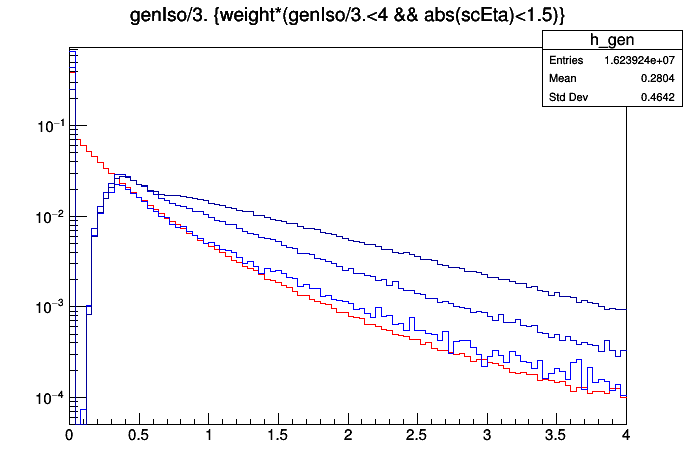

In [6]:
canv.cd()

h_gen.DrawNormalized("hist")
h_reco_pu_low.DrawNormalized("hist same")
h_reco_pu_mid.DrawNormalized("hist same")
h_reco_pu_high.DrawNormalized("hist same")

canv.SetLogy()
canv.Draw()

In [7]:
promptTree.Draw("genIso/3.*(genIso/3.>0.30)>>h_gen_thr30(100,0,4)","weight*(genIso/3.<4 && abs(scEta)<1.5)")
promptTree.Draw("genIso/3.*(genIso/3.>0.35)>>h_gen_thr35(100,0,4)","weight*(genIso/3.<4 && abs(scEta)<1.5)")
promptTree.Draw("genIso/3.*(genIso/3.>0.40)>>h_gen_thr40(100,0,4)","weight*(genIso/3.<4 && abs(scEta)<1.5)")


16239235L

In [8]:
promptTree.Draw("genIso/3.*(genIso/3.>0.25)>>h_gen_thr25(100,0,4)","weight*(genIso/3.<4 && abs(scEta)<1.5)")
promptTree.Draw("genIso/3.*(genIso/3.>0.20)>>h_gen_thr20(100,0,4)","weight*(genIso/3.<4 && abs(scEta)<1.5)")


16239235L

In [9]:
h_gen_thr20 = RT.gDirectory.Get("h_gen_thr20") 
h_gen_thr25 = RT.gDirectory.Get("h_gen_thr25")
h_gen_thr30 = RT.gDirectory.Get("h_gen_thr30") 
h_gen_thr35 = RT.gDirectory.Get("h_gen_thr35")
h_gen_thr40 = RT.gDirectory.Get("h_gen_thr40")

h_gen_thr20.SetLineColor(RT.kRed+1)
h_gen_thr25.SetLineColor(RT.kRed+2)
h_gen_thr30.SetLineColor(RT.kRed+3)
h_gen_thr35.SetLineColor(RT.kRed+4)
h_gen_thr40.SetLineColor(RT.kRed+5)

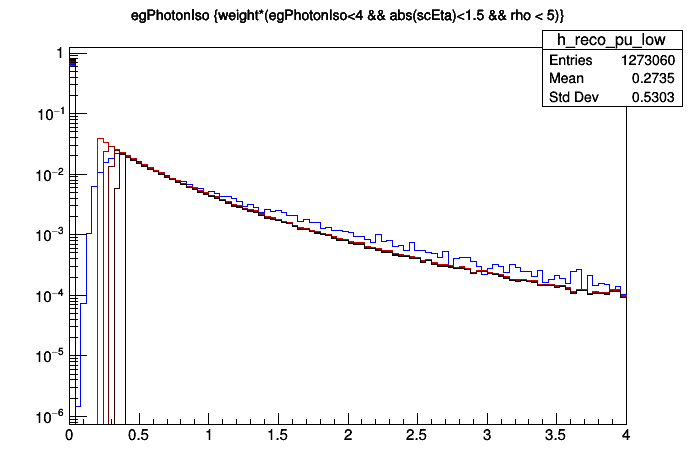

In [67]:
canv2 = RT.TCanvas()

canv2.cd()

h_reco_pu_low.DrawNormalized("hist")


h_gen_thr20.DrawNormalized("hist same")
h_gen_thr25.DrawNormalized("hist same")
h_gen_thr30.DrawNormalized("hist same")
h_gen_thr35.DrawNormalized("hist same")
h_gen_thr40.DrawNormalized("hist same")

#canv2.SetLogy(False)
#canv2.Draw()

canv2.SetLogy(True)
canv2.Draw()

In [11]:
def first_bin_frac(h):
    return h.GetBinContent(1)/h.Integral()


In [12]:
map(first_bin_frac, [h_reco_pu_low, h_gen_thr20, h_gen_thr25, h_gen_thr30, h_gen_thr35, h_gen_thr40])

[0.6612013608739844,
 0.624759450060561,
 0.6803499144657003,
 0.7250468061734723,
 0.7590661308280571,
 0.7868049123060379]

In [13]:
%%cpp -d
void addGausBranch(TTree * tree) {
    
    Float_t myrnd;
    TBranch * br = tree->Branch("myrnd",&myrnd,"myrnd/F");
    
    for(int ii=0; ii<tree->GetEntries(); ++ii) {
        myrnd = gRandom->Gaus(0,1.);
        br->Fill();
    }
    
}
    

In [14]:
RT.addGausBranch(promptTree)

In [15]:
promptTree.SetAlias("smrIso01","genIso/3.+0.1*myrnd")
promptTree.SetAlias("smrIso02","genIso/3.+0.2*myrnd")
promptTree.SetAlias("smrIso03","genIso/3.+0.3*myrnd")

promptTree.Draw("smrIso01*(smrIso01>0.30)>>h_gen_smr01_thr30(100,0,4)","weight*(smrIso01<4 && abs(scEta)<1.5)")
promptTree.Draw("smrIso02*(smrIso01>0.30)>>h_gen_smr02_thr30(100,0,4)","weight*(smrIso02<4 && abs(scEta)<1.5)")
promptTree.Draw("smrIso03*(smrIso01>0.30)>>h_gen_smr03_thr30(100,0,4)","weight*(smrIso03<4 && abs(scEta)<1.5)")


16236322L

In [16]:
h_gen_smr01_thr30 = RT.gDirectory.Get("h_gen_smr01_thr30") 
h_gen_smr02_thr30 = RT.gDirectory.Get("h_gen_smr02_thr30") 
h_gen_smr03_thr30 = RT.gDirectory.Get("h_gen_smr03_thr30") 

h_gen_smr01_thr30.SetLineColor(RT.kRed+1)
h_gen_smr02_thr30.SetLineColor(RT.kRed+2)
h_gen_smr03_thr30.SetLineColor(RT.kRed+3)


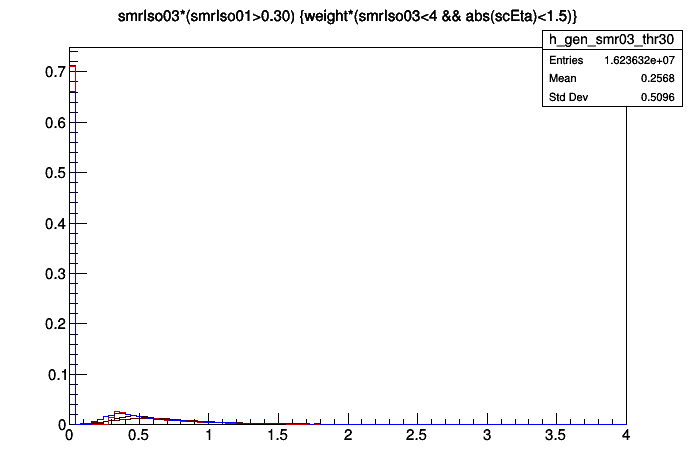

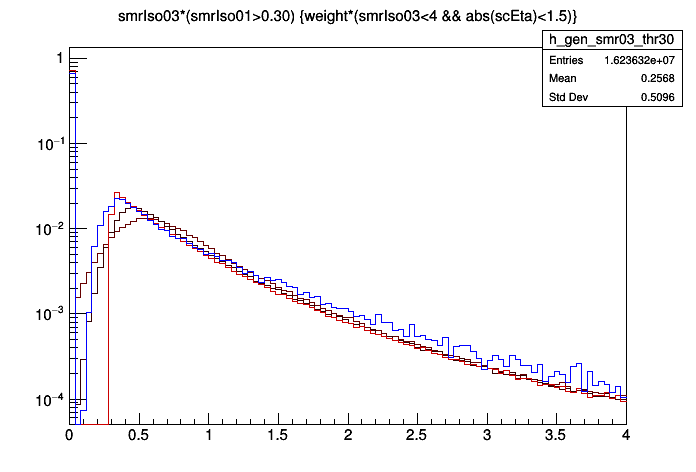

In [58]:
canv3 = RT.TCanvas()

canv3.cd()



h_gen_smr03_thr30.DrawNormalized("hist")
h_gen_smr02_thr30.DrawNormalized("hist same")
h_gen_smr01_thr30.DrawNormalized("hist same")

h_reco_pu_low.DrawNormalized("hist  same")

canv3.SetLogy(False)
canv3.Draw()

canv3.SetLogy(True)
canv3.Draw()

In [18]:
promptTree.Draw("smrIso02*(smrIso01>0.15)>>h_gen_smr02_thr15(100,0,4)","weight*(smrIso02<4 && abs(scEta)<1.5)")
promptTree.Draw("smrIso02*(smrIso01>0.20)>>h_gen_smr02_thr20(100,0,4)","weight*(smrIso02<4 && abs(scEta)<1.5)")
promptTree.Draw("smrIso02*(smrIso01>0.25)>>h_gen_smr02_thr25(100,0,4)","weight*(smrIso02<4 && abs(scEta)<1.5)")


16238026L

In [19]:

h_gen_smr02_thr15 = RT.gDirectory.Get("h_gen_smr02_thr15") 
h_gen_smr02_thr20 = RT.gDirectory.Get("h_gen_smr02_thr20") 
h_gen_smr02_thr25 = RT.gDirectory.Get("h_gen_smr02_thr25") 
h_gen_smr02_thr30 = RT.gDirectory.Get("h_gen_smr02_thr30") 


h_gen_smr02_thr15.SetLineColor(RT.kRed+1)
h_gen_smr02_thr20.SetLineColor(RT.kRed+2)
h_gen_smr02_thr25.SetLineColor(RT.kRed+3)
h_gen_smr02_thr30.SetLineColor(RT.kRed+4)


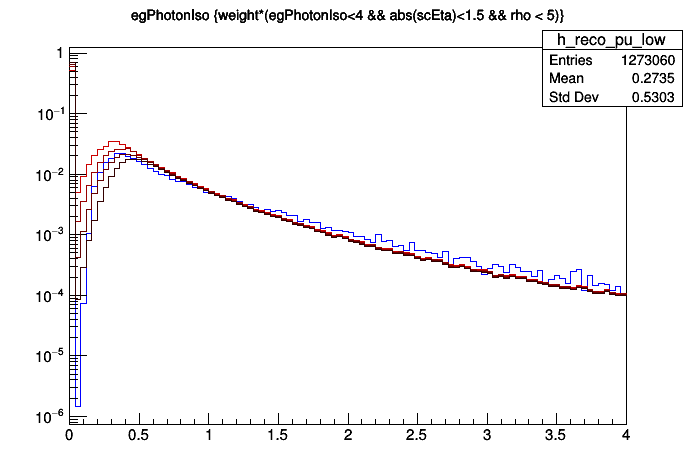

In [20]:
canv4 = RT.TCanvas()

canv4.cd()

h_reco_pu_low.DrawNormalized("hist")


h_gen_smr02_thr15.DrawNormalized("hist same")
h_gen_smr02_thr20.DrawNormalized("hist same")
h_gen_smr02_thr25.DrawNormalized("hist same")
h_gen_smr02_thr30.DrawNormalized("hist same")

canv4.SetLogy()
canv4.Draw()

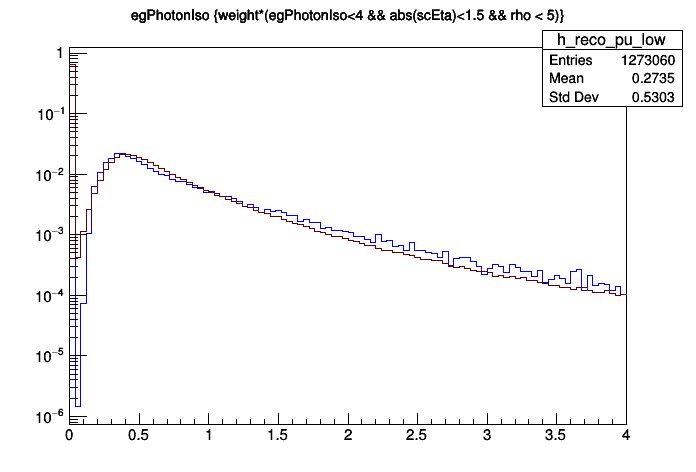

In [21]:
canv4 = RT.TCanvas()

canv4.cd()

h_reco_pu_low.DrawNormalized("hist")


h_gen_smr02_thr25.DrawNormalized("hist same")

canv4.SetLogy()
canv4.Draw()

In [22]:
scl_mid = h_reco_pu_low.GetBinContent(1)/h_reco_pu_mid.GetBinContent(1)

h_reco_pu_mid_scl = h_reco_pu_mid.Clone()

h_reco_pu_mid_scl.Scale(scl_mid)


scl_high = h_reco_pu_low.GetBinContent(1)/h_reco_pu_high.GetBinContent(1)

h_reco_pu_high_scl = h_reco_pu_high.Clone()

h_reco_pu_high_scl.Scale(scl_high)


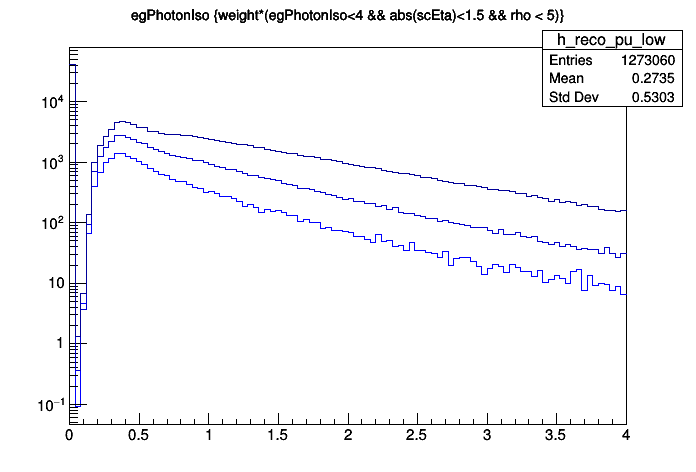

In [23]:
canv4 = RT.TCanvas()

canv4.cd()

h_reco_pu_low.Draw("hist")


h_reco_pu_mid_scl.Draw("hist same")
h_reco_pu_high_scl.Draw("hist same")


canv4.SetLogy()
canv4.Draw()

In [24]:
h_reco_pu_mid_sub = h_reco_pu_mid_scl.Clone()
h_reco_pu_high_sub = h_reco_pu_high_scl.Clone()

h_reco_pu_mid_sub.Add(h_reco_pu_low,-1.)
h_reco_pu_high_sub.Add(h_reco_pu_low,-1.)

True

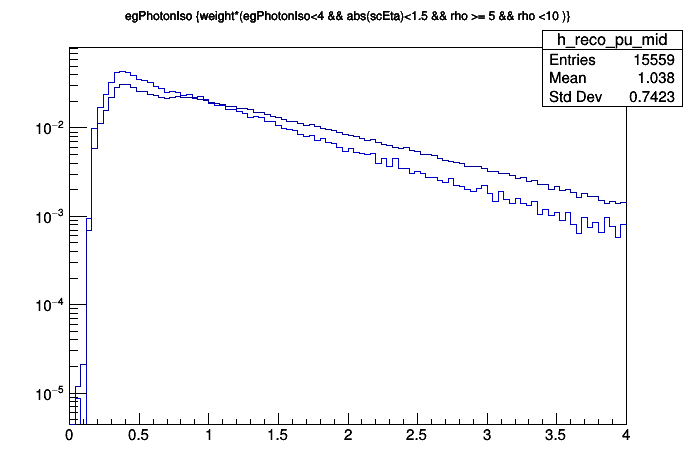

In [25]:
canv4 = RT.TCanvas()

canv4.cd()

h_reco_pu_mid_sub.DrawNormalized("hist")
h_reco_pu_high_sub.DrawNormalized("hist same")


canv4.SetLogy()
canv4.Draw()

In [26]:
# h_generate = h_gen_smr02_thr25
h_generate = h_reco_pu_low

def generate_one(h, thr):
    val = h.GetRandom()
    if val < thr: return 0.
    return val

thr = h_generate.GetXaxis().GetBinLowEdge(2)
generated = map(lambda x: generate_one(h_generate,thr), range(100000) )

In [27]:
promptTree.Draw("rho>>h_rho(20,0.5,20.5)","abs(scEta)<1.5")

16710440L

In [28]:
h_rho = RT.gDirectory.Get("h_rho")

In [29]:
generated = np.array(generated)

In [30]:
ngen = generated.size

views = []
for ncols in range(1,15):
    nrows = int(ngen) / int(ncols)
    ntot = ncols*nrows
    
    views.append( generated[:ntot].reshape(nrows,ncols).sum(axis=1) )


In [31]:
histos = []

for ih,vals in enumerate(views):
    
    h = h_gen.Clone("h_gen_%d" % ih)
    h.Reset("ICE")
    
    map(lambda x: h.Fill(x), vals)
    
    histos.append(h)

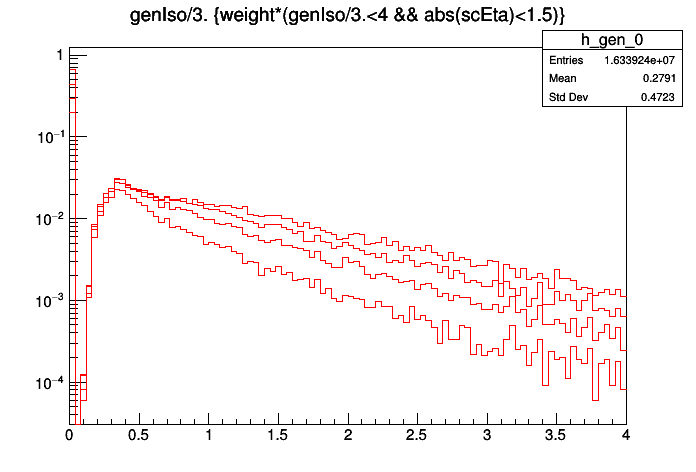

In [32]:
canv4 = RT.TCanvas()

canv4.cd()

histos[0].DrawNormalized("hist")
for h in histos[1:4]: h.DrawNormalized("hist same")

canv4.SetLogy()
canv4.Draw()

In [33]:
def get_mean(h,xmin,xmax):
    h.GetXaxis().SetRangeUser(xmin,xmax)
    return h.GetMean()

means = np.array(map(lambda x: get_mean(h_rho,*x), [(0.,5.),(5.,10.),(10.,20.)]  ))

In [34]:
means /= means[0]

In [35]:
means

array([ 1.        ,  2.08873093,  3.6575332 ])

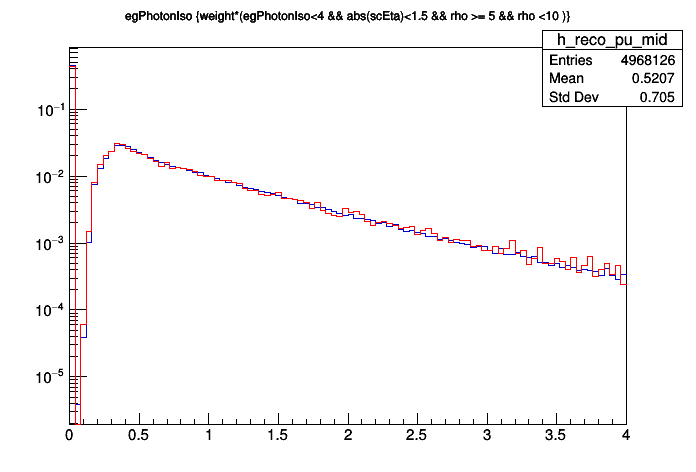

In [36]:
canv4.cd()

h_reco_pu_mid.DrawNormalized("hist")

histos[1].DrawNormalized("hist same")
canv4.Draw()

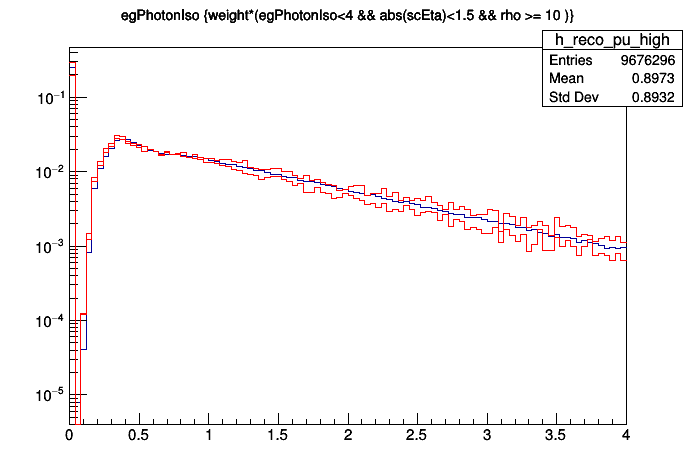

In [37]:
canv4.cd()

h_reco_pu_high.DrawNormalized("hist")

histos[2].DrawNormalized("hist same")
histos[3].DrawNormalized("hist same")

canv4.Draw()

In [38]:
zeeDataInputFile = "root://t3dcachedb03.psi.ch//pnfs/psi.ch/cms/trivcat/store/user/musella/exo/spring16/tnpTuples_ichep/Formatted_output_SingleElectron.root"

finZeeData=RT.TFile.Open(zeeDataInputFile)

zeeTreeData=finZeeData.Get('tnpAna/TaPTree')


In [39]:
zeeMCInputFile = "root://t3dcachedb03.psi.ch//pnfs/psi.ch/cms/trivcat/store/user/musella/exo/spring16/tnpTuples_ichep/Formatted_output_DYToEE_NNPDF30_13TeV-powheg-pythia8__63mb.root"

finZeeMC=RT.TFile.Open(zeeMCInputFile)

zeeTreeMC=finZeeMC.Get('tnpAna/TaPTree')


In [40]:
zeeTreeData.Draw("probe_phoiso>>h_zee_data(100,0,4)","abs(probe_eta)<1.5")

4985048L

In [47]:
zeeTreeMC.Draw("probe_phoiso>>h_zee_mc(100,0,4)","weight*(abs(probe_eta)<1.5)")

11675669L

In [48]:
h_zee_data = RT.gDirectory.Get("h_zee_data")
h_zee_mc = RT.gDirectory.Get("h_zee_mc")

In [49]:
h_zee_data

<ROOT.TH1F object ("h_zee_data") at 0xeb07c20>

In [50]:
h_zee_mc

<ROOT.TH1F object ("h_zee_mc") at 0xea98730>

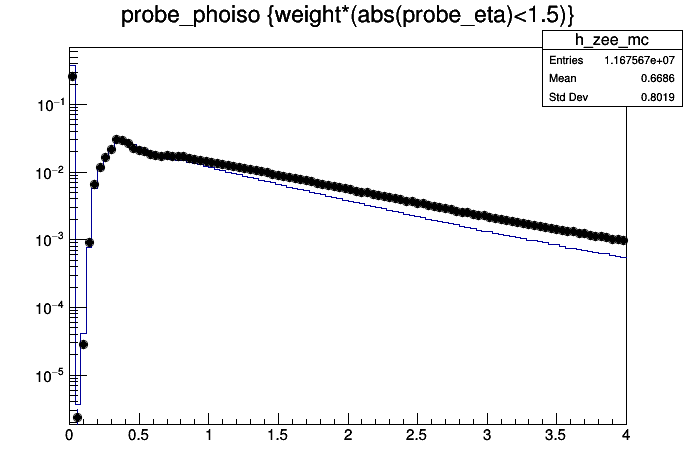

In [51]:
canv = RT.TCanvas()

canv.cd()

h_zee_mc.DrawNormalized("hist")
h_zee_data.SetMarkerColor(RT.kBlack)
h_zee_data.SetMarkerStyle(RT.kFullCircle)

h_zee_data.DrawNormalized("e same")

canv.SetLogy()
canv.Draw()

In [78]:
zeeTreeData.Draw("probe_phoiso>>h_zee_data_low_pu(100,0,4)","abs(probe_eta)<1.5 && rho < 3")
zeeTreeMC.Draw("probe_phoiso>>h_zee_mc_low_pu(100,0,4)","weight*(abs(probe_eta)<1.5 && rho < 3)")

391907L

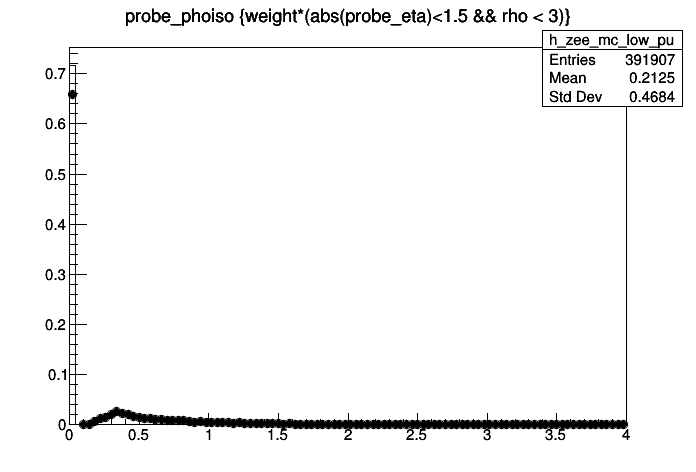

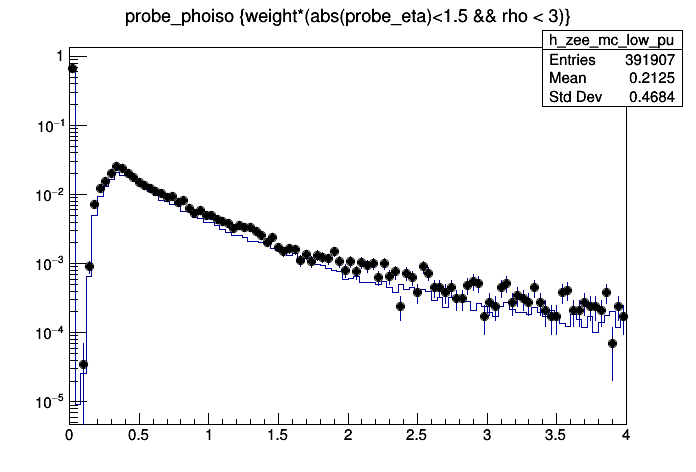

In [79]:
h_zee_data_low_pu = RT.gDirectory.Get("h_zee_data_low_pu")
h_zee_mc_low_pu = RT.gDirectory.Get("h_zee_mc_low_pu")

canv = RT.TCanvas()

canv.cd()

h_zee_mc_low_pu.DrawNormalized("hist")
h_zee_data_low_pu.SetMarkerColor(RT.kBlack)
h_zee_data_low_pu.SetMarkerStyle(RT.kFullCircle)

h_zee_data_low_pu.DrawNormalized("e same")

canv.SetLogy(False)
canv.Draw()

canv.SetLogy(True)
canv.Draw()

In [80]:
h_generate_zee = h_zee_mc_low_pu

thr = h_generate_zee.GetXaxis().GetBinLowEdge(2)
generated_zee = np.array(map(lambda x: generate_one(h_generate_zee,thr), range(100000) ))

In [81]:

ngen = generated_zee.size

views_zee = []
for ncols in range(1,15):
    nrows = int(ngen) / int(ncols)
    ntot = ncols*nrows
    
    views_zee.append( generated_zee[:ntot].reshape(nrows,ncols).sum(axis=1) )


In [93]:
histos_zee = []

for ih,vals in enumerate(views):
    
    h = h_generate_zee.Clone("h_gen_%d" % ih)
    h.Reset("ICE")
    h.SetLineColor(RT.kRed+ih)
    
    map(lambda x: h.Fill(x), vals)
    
    histos_zee.append(h)
    
    


variable "h" not defined.

variable "h.SetLIn" not defined.

variable "h" not defined.

variable "h.SetLin" not defined.


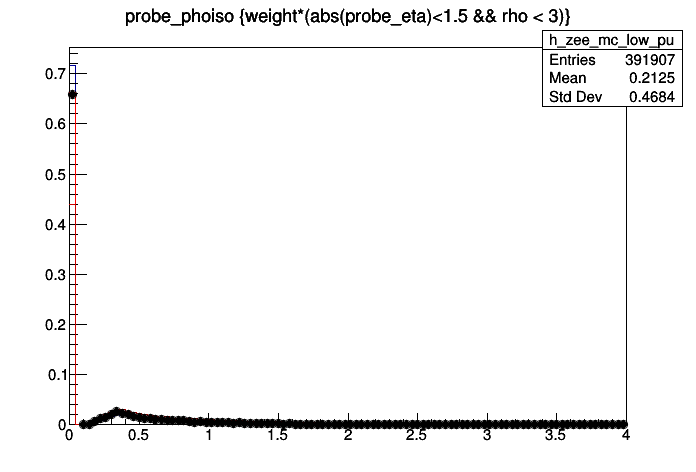

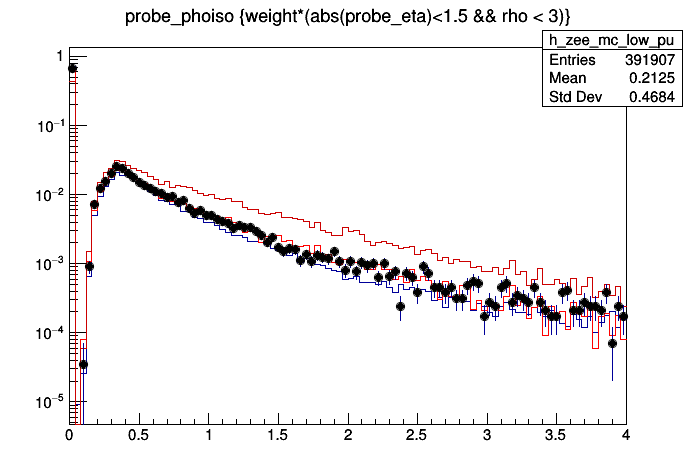

In [94]:
canv = RT.TCanvas()

canv.cd()

h_zee_mc_low_pu.DrawNormalized("hist")
histos_zee[0].DrawNormalized("hist same")
histos_zee[1].DrawNormalized("hist same")

h_zee_data_low_pu.SetMarkerColor(RT.kBlack)
h_zee_data_low_pu.SetMarkerStyle(RT.kFullCircle)
h_zee_data_low_pu.DrawNormalized("e same")

canv.SetLogy(False)
canv.Draw()

canv.SetLogy(True)
canv.Draw()

In [84]:
zeeTreeData.Draw("probe_phoiso>>h_zee_data_mid_pu(100,0,4)","abs(probe_eta)<1.5 && rho >= 5 && rho < 10")
zeeTreeMC.Draw("probe_phoiso>>h_zee_mc_mid_pu(100,0,4)","weight*(abs(probe_eta)<1.5 && rho >= 5 && rho < 10)")

3957370L

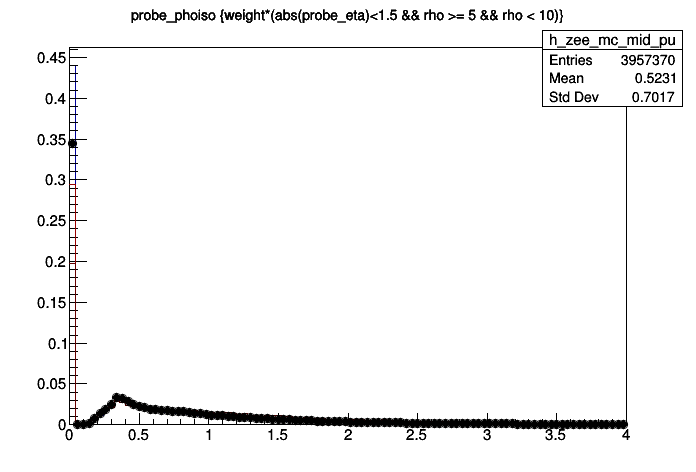

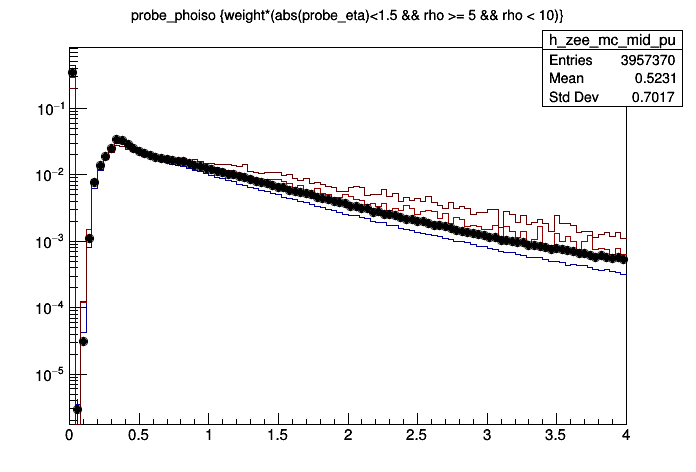

In [95]:
h_zee_data_mid_pu = RT.gDirectory.Get("h_zee_data_mid_pu")
h_zee_mc_mid_pu = RT.gDirectory.Get("h_zee_mc_mid_pu")

canv = RT.TCanvas()

canv.cd()

h_zee_mc_mid_pu.DrawNormalized("hist")
histos_zee[2].DrawNormalized("hist same")
histos_zee[3].DrawNormalized("hist same")

h_zee_data_mid_pu.SetMarkerColor(RT.kBlack)
h_zee_data_mid_pu.SetMarkerStyle(RT.kFullCircle)

h_zee_data_mid_pu.DrawNormalized("e same")

canv.SetLogy(False)
canv.Draw()

canv.SetLogy(True)
canv.Draw()

In [60]:
zeeTreeData.Draw("probe_phoiso>>h_zee_data_mid_high_pu(100,0,4)","abs(probe_eta)<1.5 && rho >= 10 && rho < 20")
zeeTreeMC.Draw("probe_phoiso>>h_zee_mc_mid_high_pu(100,0,4)","weight*(abs(probe_eta)<1.5 && rho >= 10 && rho < 20)")

5940171L

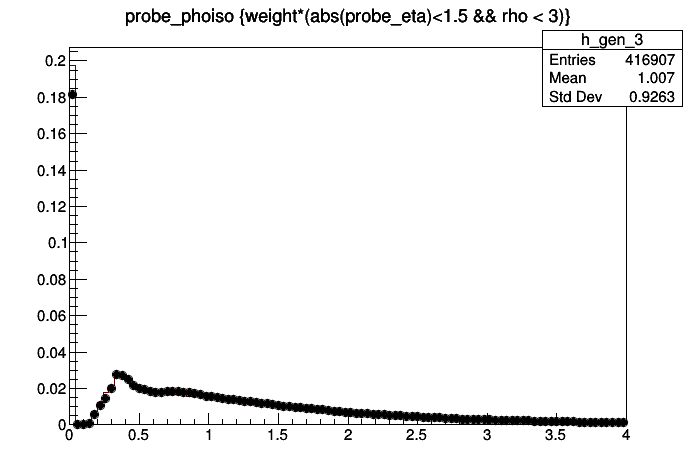

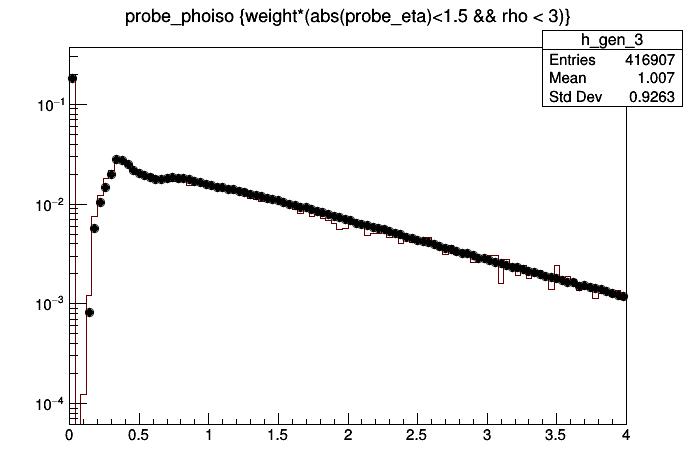

In [101]:
h_zee_data_mid_high_pu = RT.gDirectory.Get("h_zee_data_mid_high_pu")
h_zee_mc_mid_high_pu = RT.gDirectory.Get("h_zee_mc_mid_high_pu")

canv = RT.TCanvas()

canv.cd()

#h_zee_mc_mid_high_pu.DrawNormalized("hist")
#histos_zee[2].DrawNormalized("hist")
histos_zee[3].DrawNormalized("#hist")
#histos_zee[4].DrawNormalized(#"hist same")
#histos_zee[5].DrawNormalized("hist same")

h_zee_data_mid_high_pu.SetMarkerColor(RT.kBlack)
h_zee_data_mid_high_pu.SetMarkerStyle(RT.kFullCircle)

h_zee_data_mid_high_pu.DrawNormalized("e same")

canv.SetLogy(False)
canv.Draw()

canv.SetLogy(True)
canv.Draw()

In [63]:
zeeTreeData.Draw("probe_phoiso>>h_zee_data_high_pu(100,0,4)","abs(probe_eta)<1.5 && rho >= 20")
zeeTreeMC.Draw("probe_phoiso>>h_zee_mc_high_pu(100,0,4)","weight*(abs(probe_eta)<1.5 && rho >= 20)")

614637L

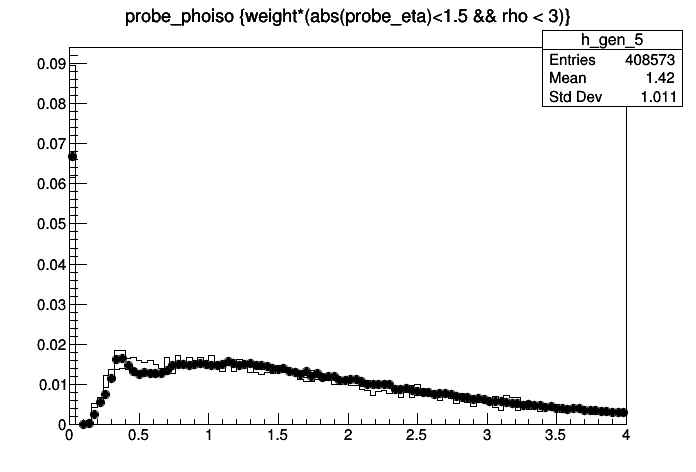

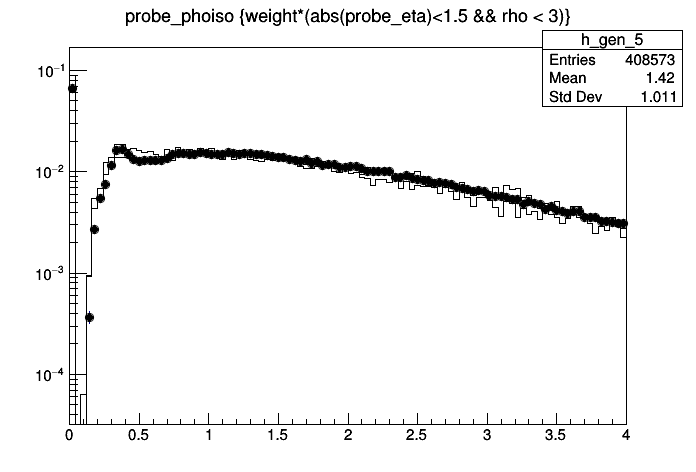

In [104]:
h_zee_data_high_pu = RT.gDirectory.Get("h_zee_data_high_pu")
h_zee_mc_high_pu = RT.gDirectory.Get("h_zee_mc_high_pu")

canv = RT.TCanvas()

canv.cd()

#h_zee_mc_high_pu.DrawNormalized("hist")
histos_zee[5].DrawNormalized("hist")
histos_zee[6].DrawNormalized("hist same")
#histos_zee[7].DrawNormalized("hist same")
#histos_zee[8].DrawNormalized("hist same")
#histos_zee[9].DrawNormalized("hist same")

h_zee_data_high_pu.SetMarkerColor(RT.kBlack)
h_zee_data_high_pu.SetMarkerStyle(RT.kFullCircle)

h_zee_data_high_pu.DrawNormalized("e same")

canv.SetLogy(False)
canv.Draw()

canv.SetLogy(True)
canv.Draw()

In [107]:
zeeTreeData.Draw("rho>>h_zee_data_rho(30,0.5,30.5)","abs(probe_eta)<1.5")
zeeTreeMC.Draw("rho>>h_zee_mc_rho(30,0.5,30.5)","weight*(abs(probe_eta)<1.5)")

11675669L

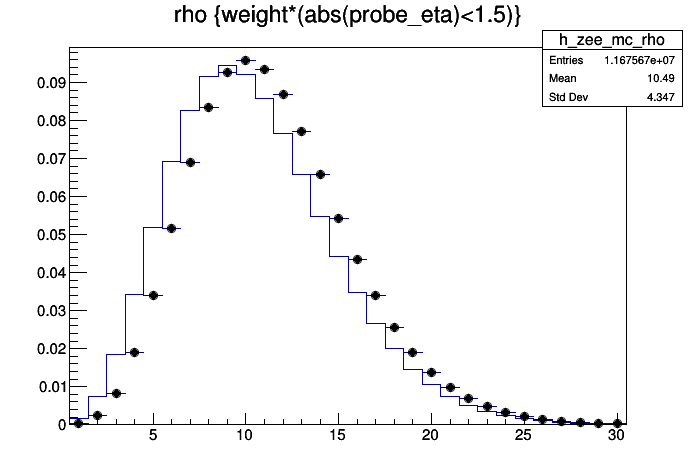

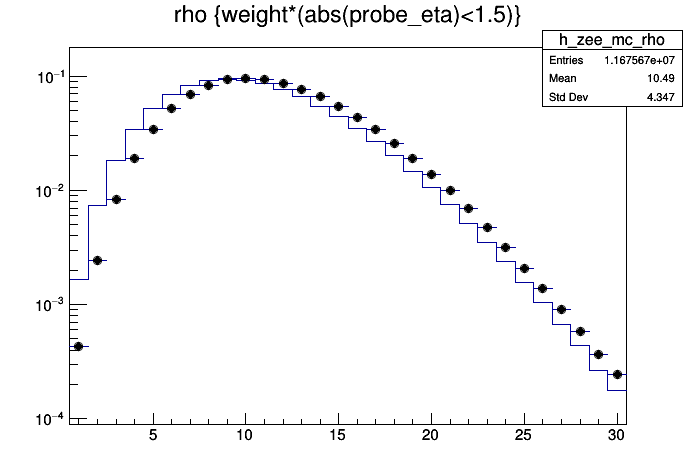

In [108]:
h_zee_data_rho = RT.gDirectory.Get("h_zee_data_rho")
h_zee_mc_rho = RT.gDirectory.Get("h_zee_mc_rho")

canv = RT.TCanvas()

canv.cd()

h_zee_mc_rho.DrawNormalized("hist")

h_zee_data_rho.SetMarkerColor(RT.kBlack)
h_zee_data_rho.SetMarkerStyle(RT.kFullCircle)

h_zee_data_rho.DrawNormalized("e same")

canv.SetLogy(False)
canv.Draw()

canv.SetLogy(True)
canv.Draw()

In [112]:
h_rho_wei = h_zee_data_rho.Clone("h_rho_wei")

h_rho_wei.Divide(h_zee_data_rho, h_zee_mc_rho, 1./h_zee_data_rho.Integral(), 1./h_zee_mc_rho.Integral())

True

In [113]:
%%cpp -d 

void addRhoWeight(TTree & tree, TH1 & weight) {
    
    Float_t rho, rho_weight;
    TBranch * br = tree.Branch("rho_weight",&rho_weight,"rho_weight/F");
    tree.SetBranchAddress("rho",&rho);
    for(int ii=0; ii<tree.GetEntries(); ++ii) {
            tree.GetEntry(ii);
            rho_weight = weight.GetBinContent(weight.FindBin(rho));
            br->Fill();
    }
}

In [114]:
RT.addRhoWeight(zeeTreeMC,h_rho_wei)


variable "RT" not defined.

variable "RT.add" not defined.

variable "RT" not defined.

variable "RT.addGausBranch" not defined.

variable "RT" not defined.

variable "RT.addRhoWeight(zee)" not defined.

tab completion not implemented for this context


In [115]:
zeeTreeMC.Draw("rho>>h_zee_mc_rho_weighted(30,0.5,30.5)","rho_weight*weight*(abs(probe_eta)<1.5)")

11675669L

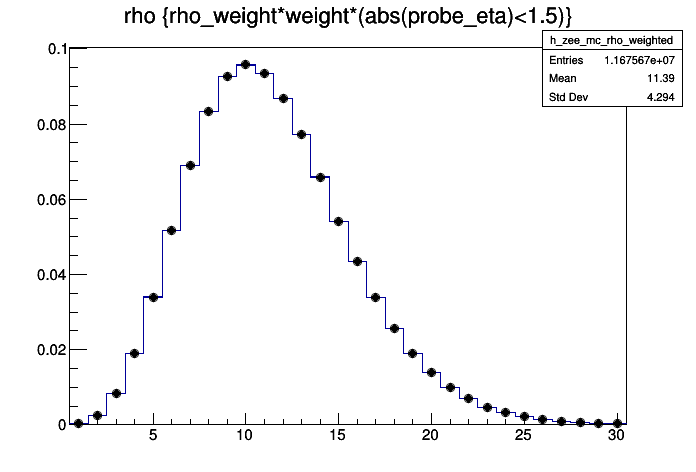

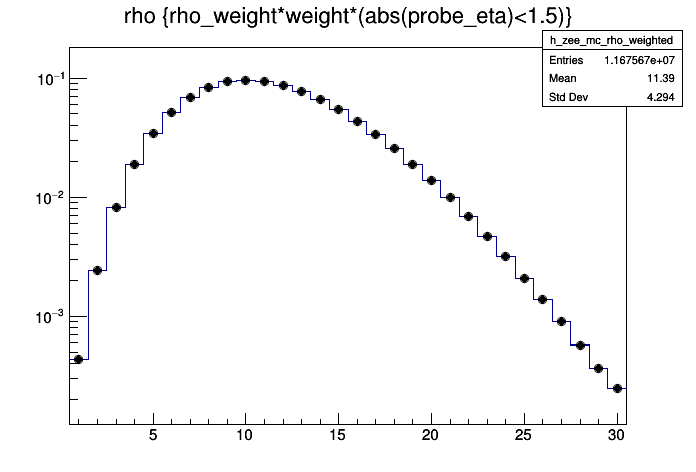

In [118]:
h_zee_data_rho = RT.gDirectory.Get("h_zee_data_rho")
h_zee_mc_rho_weighted = RT.gDirectory.Get("h_zee_mc_rho_weighted")

canv = RT.TCanvas()

canv.cd()

h_zee_mc_rho_weighted.DrawNormalized("hist")

h_zee_data_rho.SetMarkerColor(RT.kBlack)
h_zee_data_rho.SetMarkerStyle(RT.kFullCircle)

h_zee_data_rho.DrawNormalized("e same")

canv.SetLogy(False)
canv.Draw()

canv.SetLogy(True)
canv.Draw()

In [120]:
h_zee_mc_rho_weighted.Integral() / h_zee_mc_rho.Integral()

0.9989736868144613

In [121]:
zeeTreeMC.Draw("probe_phoiso>>h_zee_mc_low_pu_weighted(100,0,4)","rho_weight*weight*(abs(probe_eta)<1.5 && rho < 3)")

391907L

In [ ]:
h_zee_data_low_pu = RT.gDirectory.Get("h_zee_data_low_pu")
h_zee_mc_low_pu_weighted = RT.gDirectory.Get("h_zee_mc_low_pu_weighted")

canv = RT.TCanvas()

canv.cd()

h_zee_mc_low_pu.DrawNormalized("hist")
h_zee_mc_low_pu_weighted.SetLineColor(RT.kRed)
h_zee_mc_low_pu_weighted.DrawNormalized("hist same")

h_zee_data_low_pu.SetMarkerColor(RT.kBlack)
h_zee_data_low_pu.SetMarkerStyle(RT.kFullCircle)
h_zee_data_low_pu.DrawNormalized("e same")

canv.SetLogy(False)
canv.Draw()

canv.SetLogy(True)
canv.Draw()